# 电商数据分析
## 数据读入

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
filepath = r'../data/data.csv'
raw = pd.read_csv(filepath, encoding="ISO-8859-1")
raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 数据预处理

In [128]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [129]:
df1 = raw.copy()
#简单去重
df1 = df1.drop_duplicates()
#暂不考虑产品描述
df1.drop(["Description"],axis = 1, inplace=True)
#缺失值处理
df1["CustomerID"] = df1["CustomerID"].fillna("unknown")
#修改数据类型
df1["CustomerID"] = df1["CustomerID"].astype("str")
# df1[df1.CustomerID != df1.CustomerID]
# set(df1.CustomerID)
df1

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [130]:
#异常值查看
df1.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


负数的数量为退货，负数的价格定义为异常。

In [131]:
df1 = df1[df1["UnitPrice"] >= 0]

数据类型处理

In [132]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]
df1[["Date","Time"]]=df1["InvoiceDate"].str.split(" ",expand=True)
df1[["Month","Day","Year"]] = df1["Date"].str.split("/",expand=True)
df1["Hour"]=df1["Time"].str.split(":",expand=True)[0].astype("int")
df1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Date,Time,Month,Day,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,12/1/2010,8:26,12,1,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12/1/2010,8:26,12,1,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,12/1/2010,8:26,12,1,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12/1/2010,8:26,12,1,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12/1/2010,8:26,12,1,2010,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,10.20,12/9/2011,12:50,12,9,2011,12
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12.60,12/9/2011,12:50,12,9,2011,12
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,16.60,12/9/2011,12:50,12,9,2011,12
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,16.60,12/9/2011,12:50,12,9,2011,12


In [133]:
#将全部数据分为数量>=0的购买数据和数量<0的退货数据
data_buy = df1[df1["Quantity"] >= 0]
data_return = df1[df1["Quantity"] < 0]

## 帮助函数

In [142]:
def dist_cum_p(gp, bins):
    gp_dist = pd.cut(gp,bins=bins).value_counts().sort_index()
    tmp1 = gp_dist/gp_dist.sum()
    tmp2 = gp_dist.cumsum()/gp_dist.sum()
    dist_cum_p = pd.concat([tmp1,tmp2], axis=1)
    dist_cum_p.columns=['bin_%', 'bin_%_cum']
    return dist_cum_p

## 商品维度分析
### 最热卖的产品是哪些？退货最多的产品是哪些？

In [135]:
df2 = df1.copy()
df2

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Date,Time,Month,Day,Year,Hour
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,12/1/2010,8:26,12,1,2010,8
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12/1/2010,8:26,12,1,2010,8
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,12/1/2010,8:26,12,1,2010,8
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12/1/2010,8:26,12,1,2010,8
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,12/1/2010,8:26,12,1,2010,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,10.20,12/9/2011,12:50,12,9,2011,12
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,12.60,12/9/2011,12:50,12,9,2011,12
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,16.60,12/9/2011,12:50,12,9,2011,12
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,16.60,12/9/2011,12:50,12,9,2011,12


In [136]:
product_quantity = df2["Quantity"].groupby(df2["StockCode"]).sum().sort_values(ascending=False)
product_quantity.head(10)

StockCode
22197     56427
84077     53751
85099B    47260
85123A    38811
84879     36122
21212     36016
23084     30597
22492     26437
22616     26299
21977     24719
Name: Quantity, dtype: int64

In [137]:
product_quantity.tail(10)

StockCode
22618      -1632
79323B     -1671
79323P     -2007
23059      -2376
72732      -2472
79323LP    -2618
79323W     -4838
72140F     -5368
23003      -8516
23005     -14468
Name: Quantity, dtype: int64

### 商品的价格分布如何？价格与销量有何关系？

In [138]:
df2.UnitPrice.describe()

count    536639.000000
mean          4.673900
std          94.857114
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [139]:
data_unique_stock=df2.drop_duplicates(["StockCode"])
data_unique_stock["UnitPrice"].describe()

count     4070.000000
mean         6.905278
std        173.775142
min          0.000000
25%          1.250000
50%          2.510000
75%          4.250000
max      11062.060000
Name: UnitPrice, dtype: float64

该电商网站以销售低价商品为主。商品价格的中位数远大于平均数，是一个右偏分布，即该网站售卖的绝大部分都是低价商品，极少部分商品价格高昂，导致商品价格的标准差较大。

In [144]:
#分组的区间，左开右闭
bins = [0,1,2,3,4,5,6,7,10,15,20,25,30,100,10000,20000,30000,40000]

# price_bin=pd.cut(data_unique_stock["UnitPrice"],bins=bins).value_counts().sort_index()
# price_per=price_bin/price_bin.sum()
# price_cumper=price_bin.cumsum()/price_bin.sum()
# price_dist = pd.concat([price_per,price_cumper],axis=1)
# price_dist.columns=['bin_%', 'bin_%_cum']
price_dist = dist_cum_p(data_unique_stock["UnitPrice"], bins)
price_dist

,bin_%,bin_%_cum
"(0, 1]",0.181323,0.181323
"(1, 2]",0.231907,0.413230
"(2, 3]",0.190143,0.603372
"(3, 4]",0.078859,0.682231
"(4, 5]",0.089235,0.771466
"(5, 6]",0.050324,0.821790
"(6, 7]",0.023606,0.845396
"(7, 10]",0.087419,0.932815
"(10, 15]",0.037095,0.969909
"(15, 20]",0.012970,0.982879


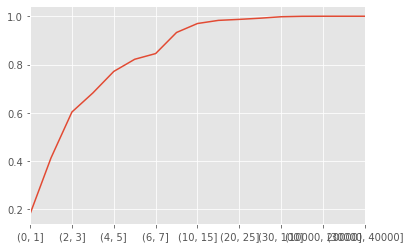

In [145]:
price_dist['bin_%_cum'].plot()

具体来看，商品价格在（1，2]的价格区间里是最多的,占23.19%；商品价格在10元以内的占了93.28%，在100元以内的占了99.79%。

In [151]:
cut=pd.cut(df2["UnitPrice"],bins=bins)
quantity_price=df2["Quantity"].groupby(cut).sum()
qpd = round(quantity_price/quantity_price.sum(),6)
quant_price_dist = quantity_price.cumsum()/quantity_price.sum()
qpdp = pd.concat([qpd,quant_price_dist],axis=1)
qpdp

,Quantity,Quantity
UnitPrice,,
"(0, 1]",0.391176,0.391176
"(1, 2]",0.325631,0.716807
"(2, 3]",0.138467,0.855274
"(3, 4]",0.045130,0.900404
"(4, 5]",0.049966,0.950371
"(5, 6]",0.012429,0.962799
"(6, 7]",0.007366,0.970165
"(7, 10]",0.018653,0.988818
"(10, 15]",0.008341,0.997159


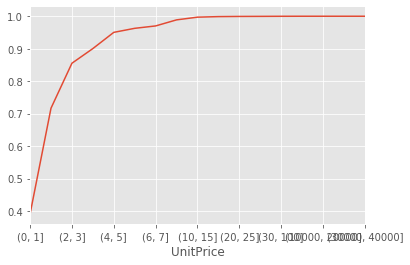

In [158]:
quant_price_dist.plot()

71.68%的商品销量集中在价格在2元以内的商品；99.7%的商品销量集中的价格在15元以内的商品。

### 退货商品的价格分布与退货量情况是怎样的？

In [156]:
data_return_unique_stock=data_return.drop_duplicates("StockCode")
# return_cut=pd.cut(data_return_unique_stock["UnitPrice"],bins=[0,1,2,3,4,5,10,15,20,50,100,200,500,1000]).value_counts().sort_index()
# pd.concat([return_cut/return_cut.sum(),return_cut.cumsum()/return_cut.sum()],axis=1)

bins_3=[0,1,2,3,4,5,10,15,20,50,100,200,500,1000]
return_dist = dist_cum_p(data_return_unique_stock["UnitPrice"], bins_3)
return_dist

,bin_%,bin_%_cum
"(0, 1]",0.227027,0.227027
"(1, 2]",0.283243,0.510270
"(2, 3]",0.172432,0.682703
"(3, 4]",0.070270,0.752973
"(4, 5]",0.079459,0.832432
"(5, 10]",0.122162,0.954595
"(10, 15]",0.027027,0.981622
"(15, 20]",0.006486,0.988108
"(20, 50]",0.007027,0.995135
"(50, 100]",0.002703,0.997838


退货商品最多的价格区间是（1，2]元，退货商品价格在10元以内的占了95.46%。

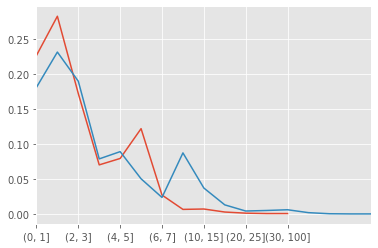

In [161]:
(return_cut/return_cut.sum()).plot()
(price_bin/price_bin.sum()).plot()
# return_dist['bin_%'].plot()
# qpd.plot()

红色是退货商品的价格分布，蓝色是全部商品的价格分布。从退货商品种类的角度，退货商品与总体商品相比，更集中在0-3元与5-10元这两个区间。

In [93]:
return_quantity_price=data_return["Quantity"].groupby(pd.cut(data_return["UnitPrice"],bins=[0,1,2,3,4,5,10,15,20,50,100,200,500,1000])).sum()
return_quantity_price/return_quantity_price.sum()

UnitPrice
(0, 1]         0.161663
(1, 2]         0.405996
(2, 3]         0.371273
(3, 4]         0.014244
(4, 5]         0.016029
(5, 10]        0.022745
(10, 15]       0.005848
(15, 20]       0.000672
(20, 50]       0.000715
(50, 100]      0.000232
(100, 200]     0.000203
(200, 500]     0.000243
(500, 1000]    0.000138
Name: Quantity, dtype: float64

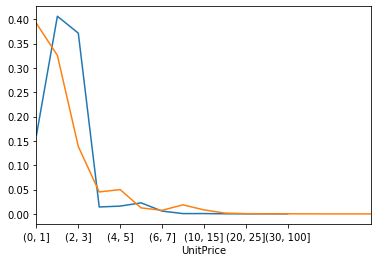

In [94]:
(return_quantity_price/return_quantity_price.sum()).plot()
(quantity_price/quantity_price.sum()).plot()

1-10元的商品退货量会偏高一些。

## 顾客维度分析

### 哪些顾客购买金额最多？

In [96]:
customer_total=data_buy["Total"].groupby(data_buy["CustomerID"]).sum().sort_values(ascending=False)
customer_total.head(11)

CustomerID
unknown    1.754902e+06
14646.0    2.802060e+05
18102.0    2.596573e+05
17450.0    1.943908e+05
16446.0    1.684725e+05
14911.0    1.437112e+05
12415.0    1.249145e+05
14156.0    1.172101e+05
17511.0    9.106238e+04
16029.0    8.085084e+04
12346.0    7.718360e+04
Name: Total, dtype: float64

缺失客户ID的订单占比很大，后续分析可能有问题。

### 哪些顾客购买次数最频繁？

In [97]:
customer_buy_fre=data_buy.drop_duplicates(["InvoiceNo"])["InvoiceNo"].groupby(data_buy["CustomerID"]).count().sort_values(ascending=False)
customer_buy_fre[:20]

CustomerID
unknown    2190
12748.0     210
14911.0     201
17841.0     124
13089.0      97
14606.0      93
15311.0      91
12971.0      86
14646.0      74
16029.0      63
13408.0      62
18102.0      60
13798.0      57
14527.0      55
14156.0      55
16422.0      51
13694.0      50
15061.0      48
15039.0      47
16013.0      47
Name: InvoiceNo, dtype: int64

### 如何根据这两个变量对顾客分类？

In [103]:
customer_total.drop("unknown",inplace=True)
customer_buy_fre.drop("unknown",inplace=True)

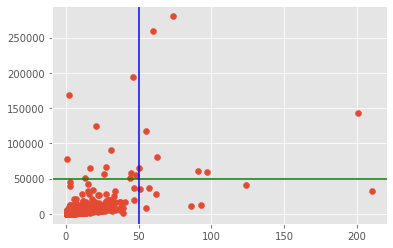

In [104]:
plt.style.use("ggplot")
plt.scatter(customer_buy_fre.sort_index(),customer_total.sort_index())
plt.axhline(y=50000,c="green")
plt.axvline(x=50,c="blue")

可以根据顾客购买次数和购买金额，对顾客进行分组，采取不同的营销措施。

### 订单的商品种类分布是怎样的？

In [120]:
order_type=data_buy["StockCode"].groupby(data_buy["InvoiceNo"]).count().sort_values(ascending=False)
# stock_dist = pd.cut(order_type,bins=[0,50,100,150,200,250,300,500,1000,1200]).value_counts()
# tmp1 = stock_dist/stock_dist.sum()
# tmp2 = stock_dist.cumsum()/stock_dist.sum()
# stock_dist_cum_p = pd.concat([tmp1,tmp2], axis=1)
# stock_dist_cum_p.columns=['bin_%', 'bin_%_cum']


In [123]:
bins_2 = [0,50,100,150,200,250,300,500,1000,1200]
dist_cum_p(order_type,bins_2)

,bin_%,bin_%_cum
"(0, 50]",0.895108,0.895108
"(50, 100]",0.073434,0.968542
"(100, 150]",0.012062,0.980604
"(150, 200]",0.007961,0.988565
"(200, 250]",0.003812,0.992377
"(300, 500]",0.003184,0.995561
"(500, 1000]",0.002316,0.997877
"(250, 300]",0.002075,0.999952
"(1000, 1200]",0.000048,1.000000


### 哪些国家的顾客消费占比最大？

### 哪些国家的顾客数量最多？

### 哪些国家的顾客平均消费最高？

## 时间维度分析

## 汇总分析